In [1]:
#clustering

In [2]:
import pandas as pd

In [4]:
data_df = pd.read_csv('./Admission.csv',header='infer')
data_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
from sklearn import cluster

#data = data_df.drop('',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data_df) 
labels = k_means.labels_
pd.DataFrame(labels, index=data_df.SOP, columns=['Cluster ID'])

,Cluster ID
SOP,
4.5,1
4.0,1
3.0,1
3.5,1
2.0,1
...,...
4.5,0
5.0,0
4.5,0


In [6]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data_df.columns)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,375.5,315.316,106.088,2.980,3.208,3.420,8.51096,0.56,0.71492
1,125.5,317.628,108.296,3.248,3.540,3.548,8.64192,0.56,0.72856


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(data_df[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating']], data_df['CGPA'], test_size=0.20, random_state=42)


In [8]:
x_test.shape

(100, 4)

In [15]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

ValueError: Incorrect number of features. Got 4 features, expected 9

Text(0, 0.5, 'SSE')

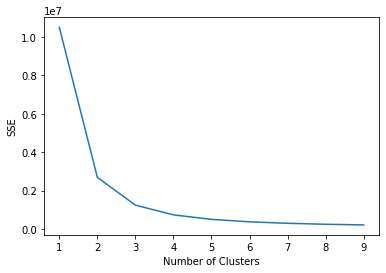

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6,7,8,9]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data_df)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

In [17]:
import pandas as pd

data = pd.read_csv('./Admission.csv',header='infer')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


/Users/saianirudhdesiraju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


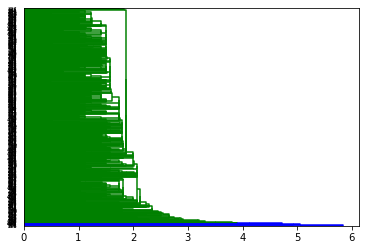

In [18]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Serial No.']
Y = data['CGPA']
X = data.drop(['Serial No.','CGPA'],axis=1)
Z = hierarchy.linkage(X.as_matrix(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

/Users/saianirudhdesiraju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


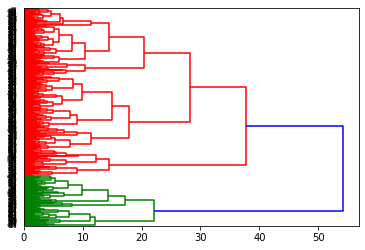

In [19]:
Z = hierarchy.linkage(X.as_matrix(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

/Users/saianirudhdesiraju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


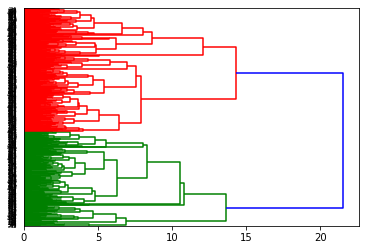

In [20]:
Z = hierarchy.linkage(X.as_matrix(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

# ANN

In [23]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

Using TensorFlow backend.


In [24]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [25]:
data = pd.read_csv('./Admission.csv',header='infer')

In [26]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [78]:
#data_df = data.drop('GRE Score', axis=1)
Classes = encode_text_index(data_df,'Research')

In [79]:
testData = [[500,0,0,0,0,1,0,1,0.1],
           [501,2,0,0,0,1,1,1,0.1],
           [502,3,0,0,0,1,1,1,0.1],
           [503,0,0,0,0,1,1,1,0.1]]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,500,0,0,0,0,1,0,1,0.1
1,501,2,0,0,0,1,1,1,0.1
2,502,3,0,0,0,1,1,1,0.1
3,503,0,0,0,0,1,1,1,0.1


In [80]:
#testData = testData.drop('SOP', axis=1)
encode_text_index(testData,'CGPA')

array([0, 1])

In [81]:
Classes

array([0, 1])

In [82]:
X,Y = to_xy(data,'Research')
testX,testY = to_xy(testData,'Research')

In [83]:
print(X.shape)
print(Y.shape)
Y

(500, 8)
(500, 2)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [76]:
model = Sequential()
model.add(Dense(12, input_dim = X.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

Epoch 1/100
 - 0s - loss: 12.3903
Epoch 2/100
 - 0s - loss: 3.8766
Epoch 3/100
 - 0s - loss: 2.0865
Epoch 4/100
 - 0s - loss: 1.1310
Epoch 5/100
 - 0s - loss: 0.9188
Epoch 6/100
 - 0s - loss: 0.8352
Epoch 7/100
 - 0s - loss: 0.7954
Epoch 8/100
 - 0s - loss: 0.7736
Epoch 9/100
 - 0s - loss: 0.7645
Epoch 10/100
 - 0s - loss: 0.7509
Epoch 11/100
 - 0s - loss: 0.7454
Epoch 12/100
 - 0s - loss: 0.7385
Epoch 13/100
 - 0s - loss: 0.7321
Epoch 14/100
 - 0s - loss: 0.7299
Epoch 15/100
 - 0s - loss: 0.7279
Epoch 16/100
 - 0s - loss: 0.7324
Epoch 17/100
 - 0s - loss: 0.7395
Epoch 18/100
 - 0s - loss: 0.7392
Epoch 19/100
 - 0s - loss: 0.7415
Epoch 20/100
 - 0s - loss: 0.7253
Epoch 21/100
 - 0s - loss: 0.7269
Epoch 22/100
 - 0s - loss: 0.7273
Epoch 23/100
 - 0s - loss: 0.7329
Epoch 24/100
 - 0s - loss: 0.7275
Epoch 25/100
 - 0s - loss: 0.7131
Epoch 26/100
 - 0s - loss: 0.7203
Epoch 27/100
 - 0s - loss: 0.7223
Epoch 28/100
 - 0s - loss: 0.7193
Epoch 29/100
 - 0s - loss: 0.7149
Epoch 30/100
 - 0s - l

In [84]:
pred = model.predict(testX)
pred

array([[9.9999976e-01, 2.0654844e-07],
       [9.9999976e-01, 2.8110924e-07],
       [9.9999976e-01, 2.9594938e-07],
       [9.9999976e-01, 2.2468394e-07]], dtype=float32)

In [85]:
pred = np.argmax(pred, axis=1)

In [87]:
true = np.argmax(testY, axis=1)

In [88]:
Classes[pred]

array([0, 0, 0, 0])

In [89]:
Classes[true]

array([0, 0, 0, 0])

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report


print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 1.00


In [91]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [ ]:
#text mining

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [35]:
txt = ["He is ::having a great Time, at the park time?",
       "She, unlike most women, is a big player on the park's grass.",
       "she can't be going"]

In [36]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['big', 'going', 'grass', 'great', 'having', 'park', 'player', 'time', 'unlike', 'women']

Every 3rd feature:
['big', 'great', 'player', 'women']


In [37]:
print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 10
Vocabulary content:
 {'having': 4, 'great': 3, 'time': 7, 'park': 5, 'unlike': 8, 'women': 9, 'big': 0, 'player': 6, 'grass': 2, 'going': 1}


In [38]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'going', 'grass', 'great', 'great time', 'having', 'having great', 'park', 'park grass', 'park time', 'player', 'player park', 'time', 'time park', 'unlike', 'unlike women', 'women', 'women big']


In [39]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'big player park', 'going', 'grass', 'great', 'great time', 'great time park', 'having', 'having great', 'having great time', 'park', 'park grass', 'park time', 'player', 'player park', 'player park grass', 'time', 'time park', 'time park time', 'unlike', 'unlike women', 'unlike women big', 'women', 'women big', 'women big player']


In [40]:
#mindf
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=0.6, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, \
meaning 0.66% of the time.\
      \nThe rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear")

['park']

Only 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, meaning 0.66% of the time.      
The rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear


In [41]:
#maxdf
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.50, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.")

['big', 'going', 'grass', 'great', 'having', 'player', 'time', 'unlike', 'women']

Only 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.


In [42]:
#maxfeatures
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=4)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'going', 'park', 'time']


In [43]:
#tfidf
txt1 = ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print ("The text: ", txt1)

The text:  ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']


In [44]:
tf.vocabulary_

{'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'she': 4, 'sang': 3}

In [45]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))
print("\nWe see that the tokens 'sang','she' have the most idf weight because \
they are the only tokens that appear in one document only.")
print("\nThe token 'not' appears 6 times but it is also in all documents, so its idf is the lowest")

{'his': 1.4054651081081644, 'not': 1.0, 'perfect': 1.4054651081081644, 'sang': 2.09861228866811, 'she': 2.09861228866811, 'smile': 1.4054651081081644, 'was': 1.4054651081081644}

We see that the tokens 'sang','she' have the most idf weight because they are the only tokens that appear in one document only.

The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest


In [46]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

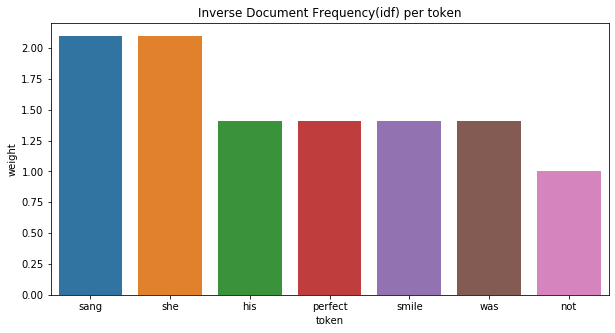

In [47]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [48]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['not' 'his' 'perfect']

Features with highest idf:
['was' 'sang' 'she']


In [49]:
print("The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1\
 its weight is 0 because it does not appear there.")
txt_transformed.toarray()

The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1 its weight is 0 because it does not appear there.


array([[1.40546511, 1.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [1.40546511, 4.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [0.        , 1.        , 0.        , 2.09861229, 2.09861229,
        0.        , 0.        ]])

In [50]:
new1 = tf.transform(txt1)

# find maximum value for each of the features over all of dataset:
max_val = new1.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:3]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-3:]]))

Features with lowest tfidf:
['his' 'perfect' 'smile']

Features with highest tfidf: 
['sang' 'she' 'not']


In [51]:
"""Lemmatizing and stemming gives us a lower ROC-AUC score. So we will only clean \\n's, Username, IP and http links"""

start_time=time.time()
# remove '\\n'
train['comment_text'] = train['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))

end_time=time.time()
print("total time",end_time-start_time)

NameError: name 'train' is not defined

In [ ]:
# remove '\\n'
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
holdout['comment_text'] = holdout['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))

In [ ]:
x = train['comment_text']
y = train.iloc[:, 2:8]  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1),
    max_features=30000)

# fit and transform on it the training features
word_vectorizer.fit(X_train)
X_train_word_features = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
test_features = word_vectorizer.transform(X_test)

# transform the holdout text for submission at the end
holdout_text = holdout['comment_text']
holdout_word_features = word_vectorizer.transform(holdout_text)

In [ ]:
class_names = ['toxic','severe_toxic','obscene', 'threat', 'insult', 'identity_hate']

losses = []
auc = []

for class_name in class_names:
    #call the labels one column at a time so we can run the classifier on them
    train_target = y_train[class_name]
    test_target = y_test[class_name]
    classifier = LogisticRegression(solver='sag', C=10)

    cv_loss = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='neg_log_loss'))
    losses.append(cv_loss)
    print('CV Log_loss score for class {} is {}'.format(class_name, cv_loss))

    cv_score = np.mean(cross_val_score(classifier, X_train_word_features, train_target, cv=5, scoring='accuracy'))
    print('CV Accuracy score for class {} is {}'.format(class_name, cv_score))
    
    classifier.fit(X_train_word_features, train_target)
    y_pred = classifier.predict(test_features)
    y_pred_prob = classifier.predict_proba(test_features)[:, 1]
    auc_score = metrics.roc_auc_score(test_target, y_pred_prob)
    auc.append(auc_score)
    print("CV ROC_AUC score {}\n".format(auc_score))
    
    print(confusion_matrix(test_target, y_pred))
    print(classification_report(test_target, y_pred))

print('Total average CV Log_loss score is {}'.format(np.mean(losses)))
print('Total average CV ROC_AUC score is {}'.format(np.mean(auc)))

